## Assignment 2: APAN PS5540
*By: Ashish Mathew*

**Summary**

In this notebook we look at the Fama French Portfolios formed on Operating Profitabilty and construct a portfolio going long on the top quantile and short on the lowest quantile in terms of operating profit.

We plot the cummulative return and cummulative excess return of this portfolio and perform regression analysis on the portfolio to examine $\alpha$ and $\beta$ of the portfolio.

*In-sample period: May 2019 - May 2024*

*Hold-out period: May 2024 - May 2025* 

### Import Packages and Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
# Daily risk-free rate data
daily_factors = "./data/F-F_Research_Data_Factors_daily.csv"
daily_factors_data = pd.read_csv(daily_factors)

# Portfolio sorted on operating profit
portfolio_OP = "./data/Portfolios_Formed_on_OP_Daily.csv"
portfolio_OP_data = pd.read_csv(portfolio_OP)

In [4]:
display(daily_factors_data.head())
display(portfolio_OP_data.head())

,Date,Mkt-RF,SMB,HML,RF
0,19260701,0.09,-0.25,-0.27,0.009
1,19260702,0.45,-0.33,-0.06,0.009
2,19260706,0.17,0.30,-0.39,0.009
3,19260707,0.09,-0.58,0.02,0.009
4,19260708,0.22,-0.38,0.19,0.009


,Date,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,2-Dec,3-Dec,4-Dec,5-Dec,6-Dec,7-Dec,8-Dec,9-Dec,Hi 10
0,19630701,-0.66,-0.63,-0.66,-0.77,-0.75,-0.55,-0.58,-0.71,-0.72,-0.79,-0.53,-0.84,-0.56,-0.54,-0.54,-0.60,-0.54,-0.80
1,19630702,0.75,0.75,0.86,0.82,0.88,0.68,0.71,0.98,0.66,0.90,0.65,0.98,0.71,0.65,0.58,0.80,0.90,1.03
2,19630703,0.46,0.73,0.59,0.34,0.98,0.62,0.64,0.46,0.31,0.36,0.60,1.14,0.79,0.37,0.40,0.81,0.56,0.41
3,19630705,0.47,0.42,0.39,0.69,0.62,0.18,0.31,0.59,0.80,0.64,0.19,0.81,0.21,0.12,0.51,0.18,0.38,0.71
4,19630708,-0.46,-0.54,-0.72,-0.39,-0.74,-0.46,-0.48,-0.82,-0.43,-0.37,-0.55,-0.81,-0.62,-0.20,-0.31,-0.60,-0.63,-0.92


In [5]:
portfolio_OP_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15583 entries, 0 to 15582
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    15583 non-null  int64  
 1   Lo 30   15583 non-null  float64
 2   Med 40  15583 non-null  float64
 3   Hi 30   15583 non-null  float64
 4   Lo 20   15583 non-null  float64
 5   Qnt 2   15583 non-null  float64
 6   Qnt 3   15583 non-null  float64
 7   Qnt 4   15583 non-null  float64
 8   Hi 20   15583 non-null  float64
 9   Lo 10   15583 non-null  float64
 10  2-Dec   15583 non-null  float64
 11  3-Dec   15583 non-null  float64
 12  4-Dec   15583 non-null  float64
 13  5-Dec   15583 non-null  float64
 14  6-Dec   15583 non-null  float64
 15  7-Dec   15583 non-null  float64
 16  8-Dec   15583 non-null  float64
 17  9-Dec   15583 non-null  float64
 18  Hi 10   15583 non-null  float64
dtypes: float64(18), int64(1)
memory usage: 2.3 MB


In [6]:
daily_factors_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26003 entries, 0 to 26002
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    26003 non-null  int64  
 1   Mkt-RF  26003 non-null  float64
 2   SMB     26003 non-null  float64
 3   HML     26003 non-null  float64
 4   RF      26003 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 1015.9 KB


In [ ]:
# Convert integer Date to Datetime
daily_factors_data['Date'] = pd.to_datetime(daily_factors_data['Date'], format='%Y%m%d')

portfolio_OP_data['Date'] = pd.to_datetime(portfolio_OP_data['Date'], format='%Y%m%d')

display(daily_factors_data.head())
display(portfolio_OP_data.head())

,Date,Mkt-RF,SMB,HML,RF
0,1926-07-01,0.09,-0.25,-0.27,0.009
1,1926-07-02,0.45,-0.33,-0.06,0.009
2,1926-07-06,0.17,0.30,-0.39,0.009
3,1926-07-07,0.09,-0.58,0.02,0.009
4,1926-07-08,0.22,-0.38,0.19,0.009


,Date,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,2-Dec,3-Dec,4-Dec,5-Dec,6-Dec,7-Dec,8-Dec,9-Dec,Hi 10
0,1963-07-01,-0.66,-0.63,-0.66,-0.77,-0.75,-0.55,-0.58,-0.71,-0.72,-0.79,-0.53,-0.84,-0.56,-0.54,-0.54,-0.60,-0.54,-0.80
1,1963-07-02,0.75,0.75,0.86,0.82,0.88,0.68,0.71,0.98,0.66,0.90,0.65,0.98,0.71,0.65,0.58,0.80,0.90,1.03
2,1963-07-03,0.46,0.73,0.59,0.34,0.98,0.62,0.64,0.46,0.31,0.36,0.60,1.14,0.79,0.37,0.40,0.81,0.56,0.41
3,1963-07-05,0.47,0.42,0.39,0.69,0.62,0.18,0.31,0.59,0.80,0.64,0.19,0.81,0.21,0.12,0.51,0.18,0.38,0.71
4,1963-07-08,-0.46,-0.54,-0.72,-0.39,-0.74,-0.46,-0.48,-0.82,-0.43,-0.37,-0.55,-0.81,-0.62,-0.20,-0.31,-0.60,-0.63,-0.92


In [8]:
portfolio_OP_data.columns

Index(['Date', 'Lo 30', 'Med 40', 'Hi 30', 'Lo 20', 'Qnt 2', 'Qnt 3', 'Qnt 4',
       'Hi 20', 'Lo 10', '2-Dec', '3-Dec', '4-Dec', '5-Dec', '6-Dec', '7-Dec',
       '8-Dec', '9-Dec', 'Hi 10'],
      dtype='object')

In [ ]:
# select quantile portfolios based on market size and join with riskfree rate and market excess data
keep_columns = [
    'Date',
    'Lo 20', 
    'Qnt 2', 
    'Qnt 3',
    'Qnt 4', 
    'Hi 20',
    'Mkt-RF',
    'RF',
    ]

data = portfolio_OP_data.merge(daily_factors_data, on="Date", how="inner")
data = data[keep_columns]

print(portfolio_OP_data.shape)
print(daily_factors_data.shape)
print(data.shape)

(15583, 19)
(26003, 5)
(15583, 8)


In [10]:
data = data.set_index('Date')
data.head()

,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Mkt-RF,RF
Date,,,,,,,
1963-07-01,-0.77,-0.75,-0.55,-0.58,-0.71,-0.67,0.012
1963-07-02,0.82,0.88,0.68,0.71,0.98,0.79,0.012
1963-07-03,0.34,0.98,0.62,0.64,0.46,0.63,0.012
1963-07-05,0.69,0.62,0.18,0.31,0.59,0.40,0.012
1963-07-08,-0.39,-0.74,-0.46,-0.48,-0.82,-0.63,0.012


In [11]:
# set insample and out of sample period
from datetime import date
start_dt = date(2019,5,1)
cutoff_dt = date(2024,5,1)
end_dt = date(2025,5,1)

In [ ]:
# Contruct portfolio to go long on Hi 20 portfolio and short on Lo 20 portfolio in terms of operating profitability
long_short_returns = data['Hi 20'] - data['Lo 20']

data['Long_Short'] = long_short_returns

# split data into train and test based on start, end and cutoff dates
# divide by 100 since returns are in percentage
train = data.loc[start_dt:cutoff_dt] / 100
test = data.loc[cutoff_dt:end_dt] / 100

# Basic statistics of the long short portfolio during the insample period
print("Long-Short Portfolio Statistics:")
print(f"Mean Daily Return: {train['Long_Short'].mean():.6f}")
print(f"Standard Deviation: {train['Long_Short'].std():.6f}")
print(f"Annualized Sharpe Ratio: {train['Long_Short'].mean() / train['Long_Short'].std() * np.sqrt(252):.4f}")

Long-Short Portfolio Statistics:
Mean Daily Return: 0.000317
Standard Deviation: 0.009582
Annualized Sharpe Ratio: 0.5257


In [ ]:
cumulative_returns = (1 + train).cumprod() - 1
cumulative_returns.head()

,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Mkt-RF,RF,Long_Short
Date,,,,,,,,
2019-05-01,-0.011000,-0.010700,-0.010700,-0.008200,-0.003900,-0.008300,0.00009,0.007100
2019-05-02,-0.015154,-0.011689,-0.010898,-0.010679,-0.004597,-0.009887,0.00018,0.010625
2019-05-03,-0.000578,-0.001609,-0.000117,-0.000193,0.007049,0.001302,0.00027,0.007492
2019-05-06,-0.006575,-0.005602,-0.002416,-0.002792,0.000805,-0.002604,0.00036,0.007290
2019-05-07,-0.026046,-0.021314,-0.017480,-0.019645,-0.016609,-0.019460,0.00045,0.009506


### Plotting Cumulative Return

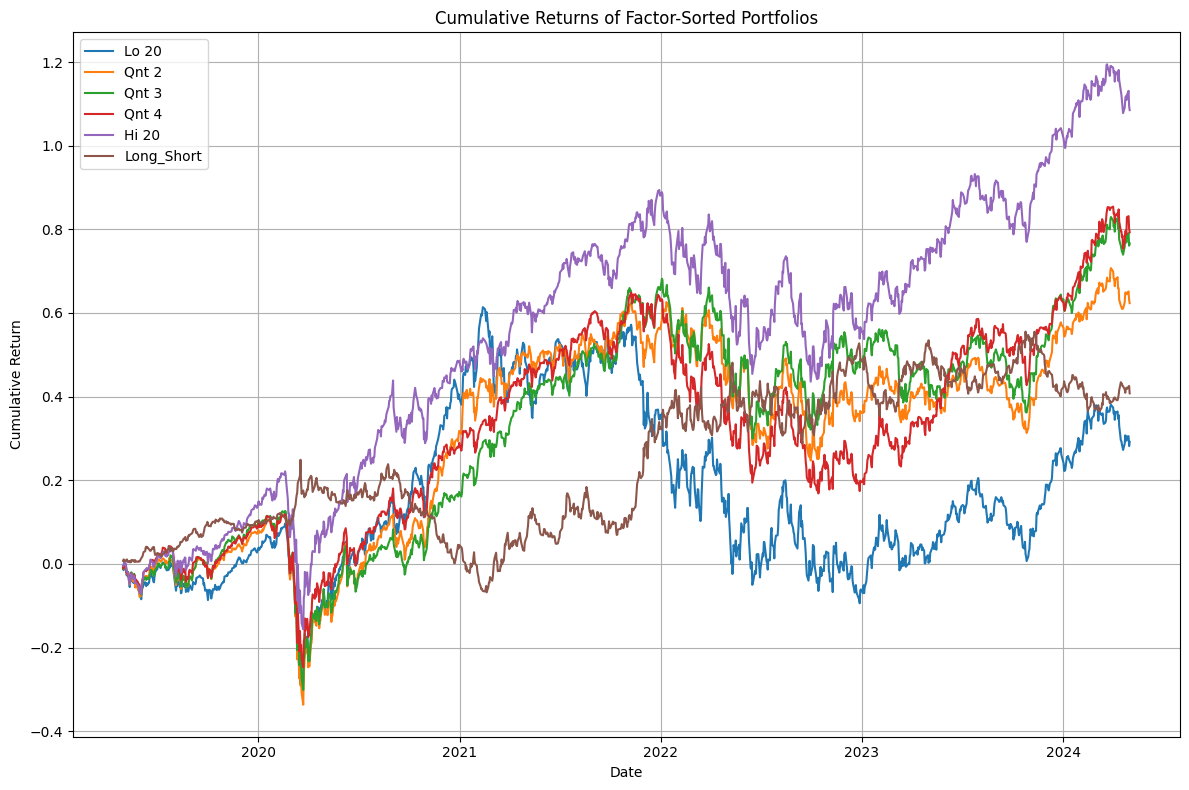

In [14]:
portfolios = ['Lo 20', 'Qnt 2', 'Qnt 3', 'Qnt 4', 'Hi 20', 'Long_Short']
# Plot cumulative returns
plt.figure(figsize=(12,8))
for portfolio in portfolios:
    
    plt.plot(cumulative_returns.index, cumulative_returns[portfolio], label=portfolio)

plt.title('Cumulative Returns of Factor-Sorted Portfolios')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

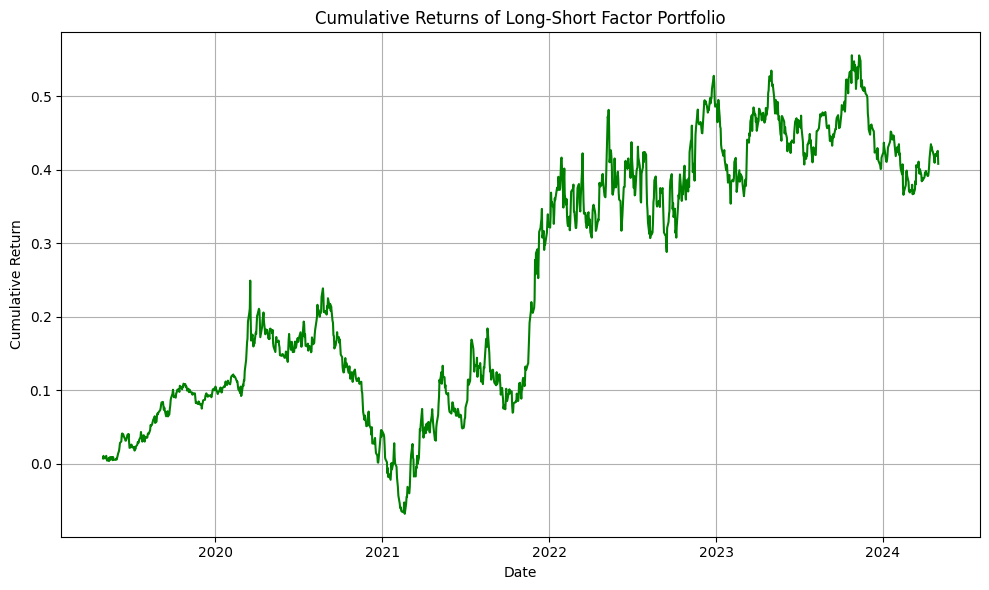

In [15]:
# Focus on just the long-short portfolio
plt.figure(figsize=(10, 6))
plt.plot(cumulative_returns.index, cumulative_returns['Long_Short'], color='green')
plt.title('Cumulative Returns of Long-Short Factor Portfolio')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid(True)
plt.tight_layout()
plt.show()

### Plotting Cumulative Excess Return

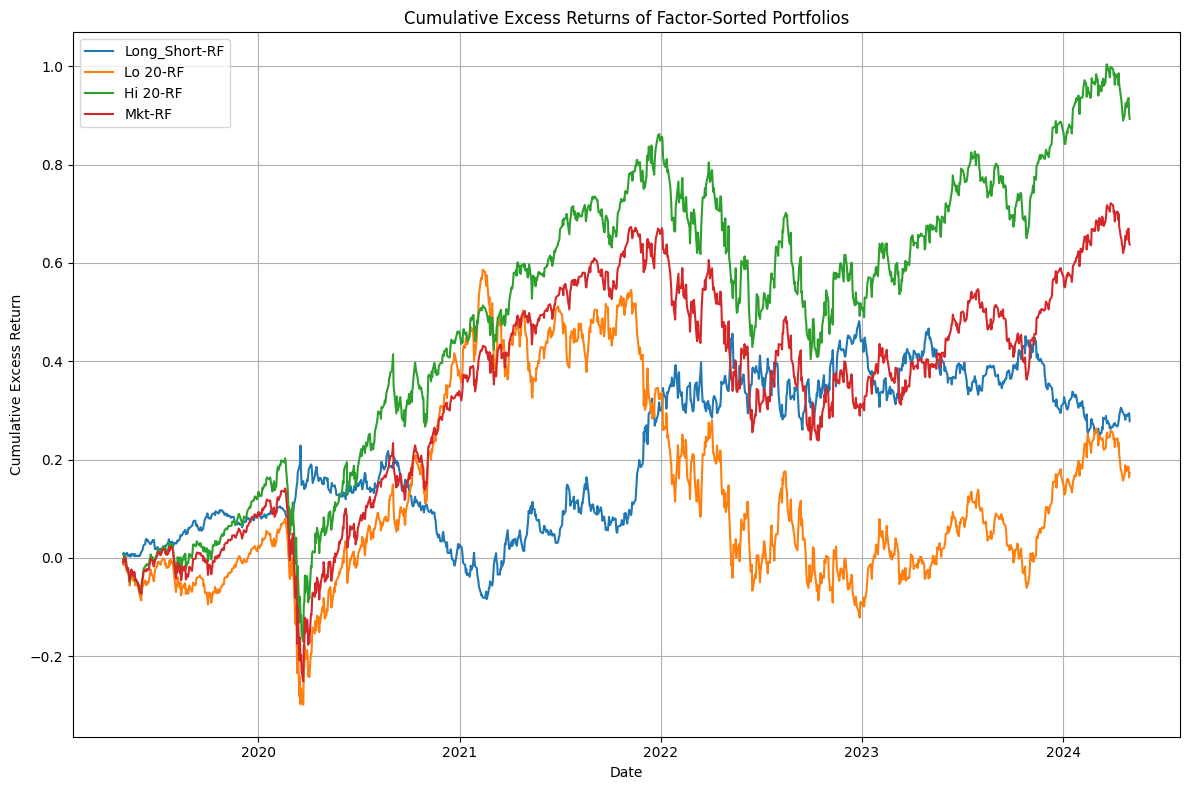

In [16]:
train['Long_Short-RF'] = train['Long_Short'] - train['RF']
train['Lo 20-RF'] = train['Lo 20'] - train['RF']
train['Hi 20-RF'] = train['Hi 20'] - train['RF']
keep_columns = ['Long_Short-RF','Lo 20-RF','Hi 20-RF','Mkt-RF']
cumulative_returns = (1 + train).cumprod() - 1

plt.figure(figsize=(12,8))
for column in keep_columns:
    plt.plot(cumulative_returns.index, cumulative_returns[column], label=column)

plt.title('Cumulative Excess Returns of Factor-Sorted Portfolios')
plt.xlabel('Date')
plt.ylabel('Cumulative Excess Return')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

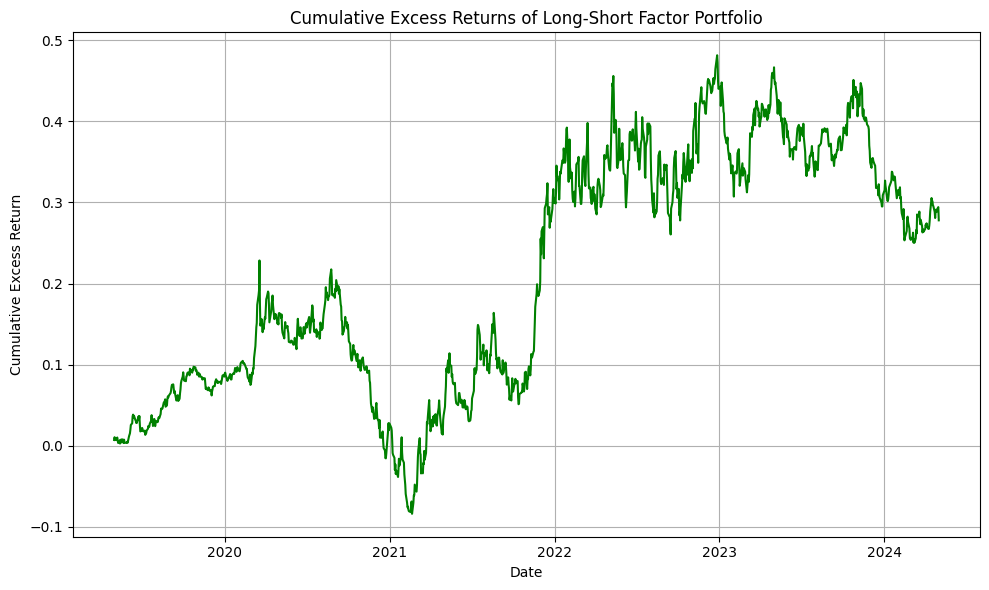

In [17]:
# Focus on just the long-short portfolio
plt.figure(figsize=(10, 6))
plt.plot(cumulative_returns.index, cumulative_returns['Long_Short-RF'], color='green')
plt.title('Cumulative Excess Returns of Long-Short Factor Portfolio')
plt.xlabel('Date')
plt.ylabel('Cumulative Excess Return')
plt.grid(True)
plt.tight_layout()
plt.show()

### Regression Analysis

In [18]:
import statsmodels.api as sm

In [19]:
X = train['Mkt-RF']
X = sm.add_constant(X)
y = train['Long_Short-RF']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Long_Short-RF   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     97.22
Date:                Wed, 09 Jul 2025   Prob (F-statistic):           3.84e-22
Time:                        16:07:13   Log-Likelihood:                 4115.6
No. Observations:                1260   AIC:                            -8227.
Df Residuals:                    1258   BIC:                            -8217.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      1.272      0.2

Long Short Portfolio has a $\beta$ of -0.18 and a $\alpha$ that is not statistically significant from 0

### Out of Sample Regression Analysis

In [20]:
from scipy.stats import ttest_1samp

test['Long_Short-RF'] = test['Long_Short'] - test['RF']
X = test['Mkt-RF']
X = sm.add_constant(X)
y_pred = model.predict(X)

abnormal_return = test['Long_Short-RF'] - y_pred

print(f"Mean Abnormal Return: {np.mean(abnormal_return):.4f}")
print(f"Std Dev Abnormal Return: {np.std(abnormal_return):.4f}")

t_stat, p_value = ttest_1samp(abnormal_return, popmean=0)

if p_value < 0.05:
    print(f"p-value: {p_value:.4f} \nWe reject the null hypothesis; abnormal return (alpha) is statistically significant from zero")
elif p_value >= 0.05:
    print(f"p-value: {p_value:.4f} \nWe fail to reject the null hypothesis; abnormal return (alpha) is not statistically significant from zero")

Mean Abnormal Return: -0.0004
Std Dev Abnormal Return: 0.0092
p-value: 0.4934 
We fail to reject the null hypothesis; abnormal return (alpha) is not statistically significant from zero
